# **Unsupervised Learning**

- It is a branch of Machine Learning where algorithms learn from **'unlabeled'** data (No Target)
- Unlike supervised learning, where target is pre-categorized, unsupervised learning discovers patterns and structures within the data on their own
- It classifes unsorted information according to patterns, differences, or similarities

- Types of Unsupervised Learning:
    - **`Clustering`**: grouping similar data points together eg: launching customized marketing campaigns(based on different segments of customer based data - behavior and/or demographics)
        - Example of sub-groups:
            - Sub Group 1:
                - Age (12-18)
                - Gender (Male)
                - Favorite Ice Cream (blue ice cream)
            
            - Sub Group 2:
                - Age (23-50)
                - Gender (Male)
                - Favorite Ice Cream (Coffee ice cream)

    - **`Dimensionality Reductions`**: Simplifying the number of features (dimensions) while preserving their essential columns (this is not dropping columns). Applications: Visualization for high-dimensional dataset for easier interpretation and performance optimization
    Its like compressing different features into 1 feature
    - **`Anomaly Detection`**: Spotting abnormal data points or outliers eg: Fradulant transactions, cybersecurity for unknown new attacks 
    - **`Association`**: Discovering relationships between items eg: Recommendation Engines (Amazon Recommending books that you may like)


## **`Clustering `**

- Types of Clustering:
    - **`Centroid-Based Clustering`** (eg: **K-Means** and **K-Medoids**)
        - Mechanism: Dividing the data into k-fixed clusters by minimizing the intra-cluster variance
    - **`Hierarchial Clustering`** (eg: **Agglomerative Clustering**)
        - Mechanism: Creating a tree of clusters by either merging (bottom-up) them or splitting them (top-down)
    - **`Density-Based Clustering`** (eg: **DBSCAN**) 
        - Mechansim: Forming clusters by connecting dense regions of points and ignoring sparse noise
    - **`Distributed-Based Clustering`** (eg: **GMM**)
        - Mechanism: It assumes that data points represents Gaussian distributions and then you split based on different Gaussian Distributions

### **Centroid-Based Clustering**

#### Exercise: Visualizing K-Means Clustering
- Choose 3 of the Type 1 column of the dataset and then categorize pokemon 
- Remove the unnecessary columns and use Unsupervised Learning to determine the classes(clustering) based on 2 features (Attack and Defense)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [44]:
df = pd.read_csv('/home/vinayakgaur07/Downloads/pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [45]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [46]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [47]:
df_1 = df.copy()

In [48]:
type_1_filter = df['Type 1'].isin(['Grass', 'Fire', 'Water'])  
type_1_filter

0       True
1       True
2       True
3       True
4       True
       ...  
795    False
796    False
797    False
798    False
799     True
Name: Type 1, Length: 800, dtype: bool

In [49]:
type_1_filter = df['Type 1'].isin(['Grass', 'Fire', 'Water'])           #this chooses only 'Grass', 'Fire', 'Water' from Type 1 column 

drop_cols = ['#', 'Name', 'Type 2', 'Generation', 'Legendary']

df_1 = df[type_1_filter].drop(columns=drop_cols, axis=1)
df_1.head()

#NOTE: there are no quotes in df[type_1_filter] --> so it means it is converting type_1_filter into dataframe cuz drop can only be applied on dataframe

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Grass,318,45,49,49,65,65,45
1,Grass,405,60,62,63,80,80,60
2,Grass,525,80,82,83,100,100,80
3,Grass,625,80,100,123,122,120,80
4,Fire,309,39,52,43,60,50,65


>- df['type_1_filter'] --> Select column named type_1_filter
>- df[type_1_filter] --> Filter rows using Boolean mask

##### Build The K-Means Clusters
1. Define out KMeans Functions with 3 clusters 
2. Fit the data on Attack and Defense Columns and add the output cluster classes to the original data
3. Visualize the clusters:
    - Calculate Centroids
    - Define a different color for each cluster
    - Plot all the elements

![cluster](https://miro.medium.com/v2/resize:fit:720/format:webp/1*rw8IUza1dbffBhiA4i0GNQ.png)

Step 1:

In [50]:
kmeans_model = KMeans(n_clusters=3, random_state=10)

Step 2:

In [51]:
df['Cluster'] = kmeans_model.fit_predict(df[['Attack', 'Defense']])

> .fit_predict() does both fit and predict in the same line 

In [52]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,2
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,2
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,2


> creates a new column - Cluster

In [53]:
df['Cluster'].value_counts()

Cluster
0    334
2    318
1    148
Name: count, dtype: int64

Step 3:

In [54]:
centroid = kmeans_model.cluster_centers_
centroid

array([[ 91.30538922,  74.68562874],
       [112.58783784, 120.37837838],
       [ 50.44654088,  51.29874214]])

> above are coordinates for the centroid centres in a graph

Now if we want to plot these --> we would have to split these coordinates into x and y so that we can plot them

In [55]:
cent_x = centroid[:,0]
cent_y = centroid[:,1]

#after splitting the x, y coordinates we will add them in our original dataset so that we can make a plot using matplotlib 

df['CentX'] = df['Cluster'].map({0:cent_x[0], 1:cent_x[1], 2:cent_x[2]})
df['CentY'] = df['Cluster'].map({0:cent_y[0], 1:cent_y[1], 2:cent_y[2]})
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster,CentX,CentY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,2,50.446541,51.298742
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,2,50.446541,51.298742
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0,91.305389,74.685629
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1,112.587838,120.378378
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,2,50.446541,51.298742


In [56]:
color_list = ['#FF1AE9', '#19DAF7', '#ADF719']

#make it a dataframe
df['ClusterColor'] = df['Cluster'].map({0:color_list[0], 1:color_list[1], 2:color_list[2]})

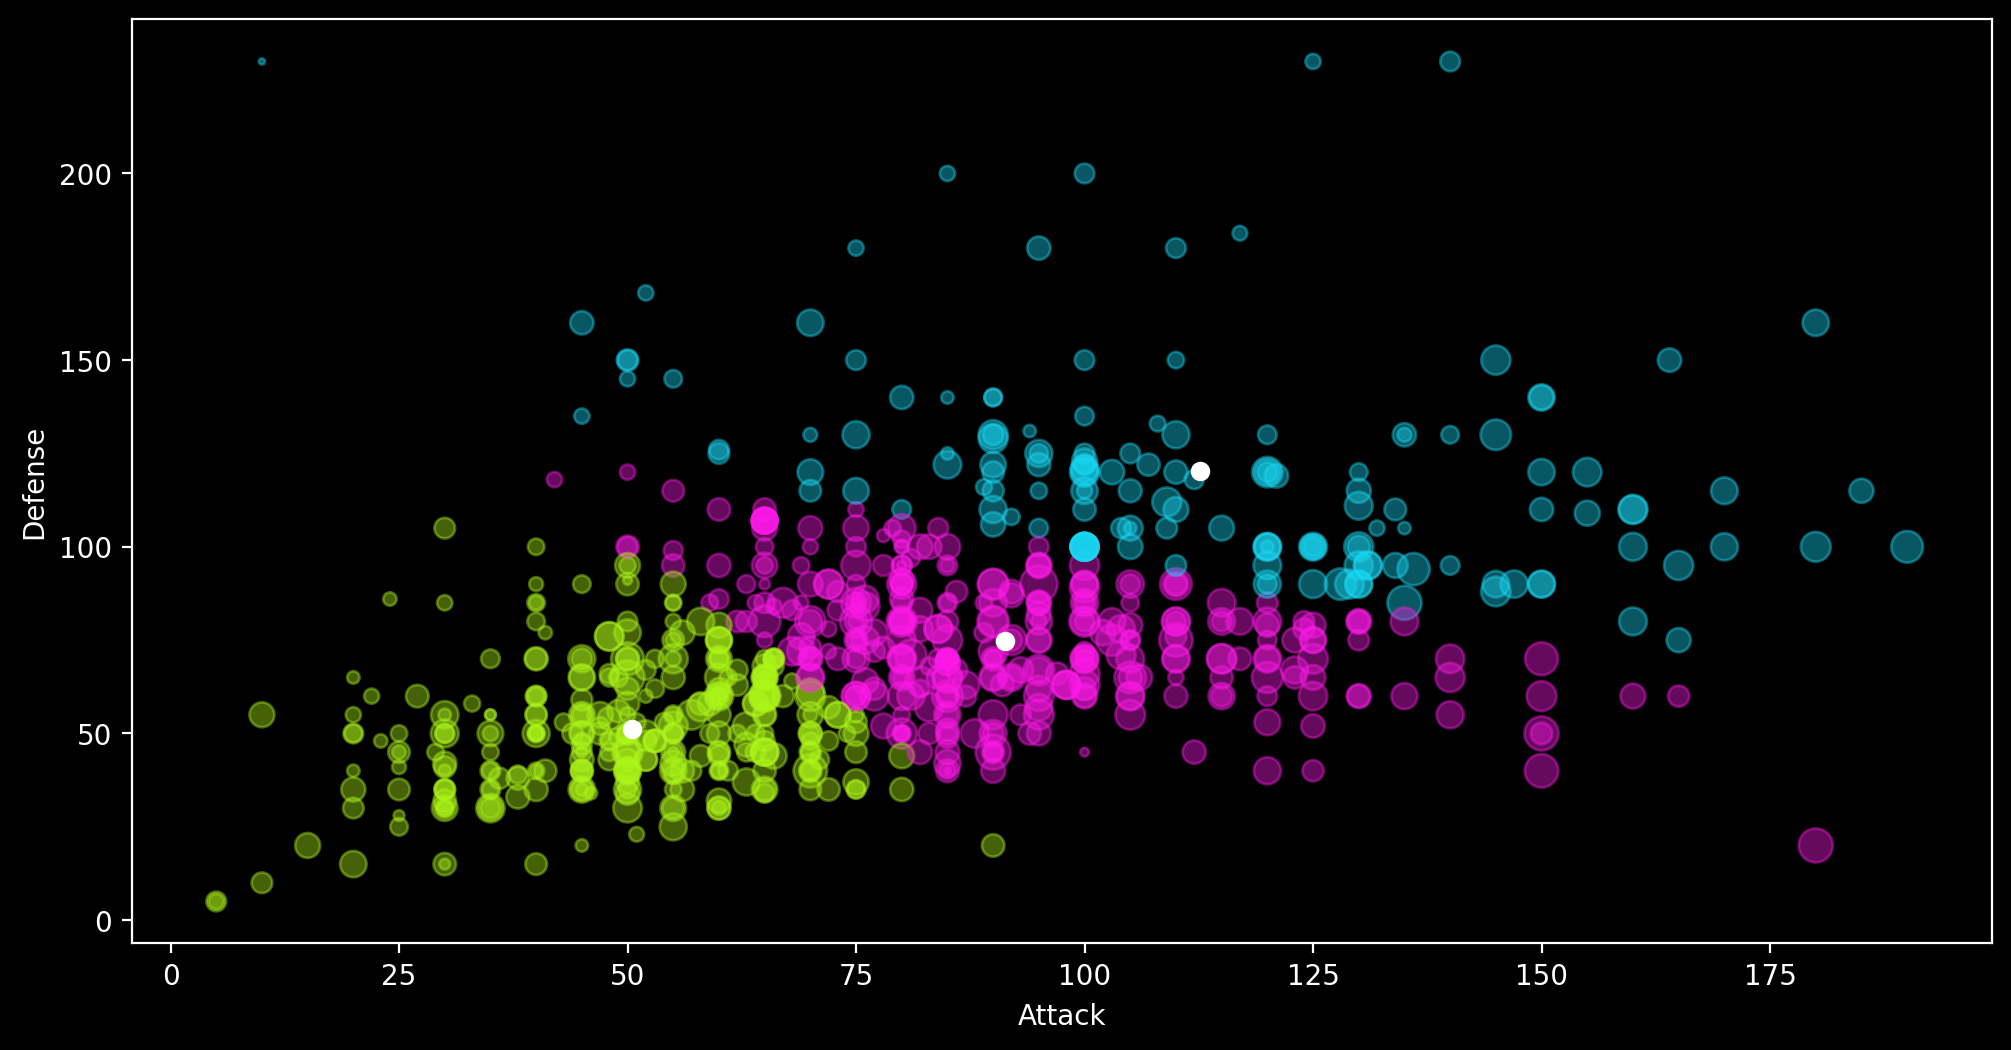

In [57]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6), dpi=200)
plt.scatter(x=df['Attack'], y=df['Defense'], c=df['ClusterColor'], s=df['Speed'] ,alpha=0.4)
plt.xlabel('Attack')
plt.ylabel('Defense')

#plotting centroids:
plt.scatter(x=cent_x, y=cent_y, c='White')      #white dot

##### Performance Evaluation:
- In Unsupervised Learning, we don't have Ground Truth Labels, so we cannot compare apples-to-apples (prediction vs actual)
- Alternative:
    - Subject Expert --> analyze the overall attributes of the data points and determine if they make sense
    - Cohesiveness Measurement: eg: Silhouette Score --> it has a range of -1 to 1 and we want as higher value as possible 

In [58]:
df.groupby(['Cluster'])[['Total', 'HP', 'Attack', 'Defense', 'Speed']].agg(['mean', 'median', 'max', 'min']).T

#NOTE: mind the braces 

Cluster                  0           1           2
Total   mean    470.260479  567.493243  336.559748
        median  480.000000  580.000000  319.500000
        max     780.000000  780.000000  590.000000
        min     236.000000  375.000000  180.000000
HP      mean     74.973054   82.310811   57.182390
        median   75.000000   80.000000   52.500000
        max     170.000000  150.000000  255.000000
        min       1.000000   20.000000   10.000000
Attack  mean     91.305389  112.587838   50.446541
        median   85.000000  110.000000   50.000000
        max     180.000000  190.000000   90.000000
        min      42.000000   10.000000    5.000000
Defense mean     74.685629  120.378378   51.298742
        median   75.000000  115.000000   50.000000
        max     120.000000  230.000000  105.000000
        min      20.000000   75.000000    5.000000
Speed   mean     75.547904   72.222973   58.805031
        median   74.500000   75.000000   58.000000
        max     180.000000  150.000000  150.000000
        min       5.000000    5.000000   10.000000

##### Silhouette Score Analysis: 

In [59]:
from sklearn.metrics import silhouette_score, silhouette_samples

score = silhouette_score(df[['Attack', 'Defense']], df['Cluster'])

In [60]:
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.353


Silhouette Score:
- Closer to +1: Clusters are well-separated
- Around 0: Clusters overlap
- Negative: Poor Clustering

Find the points that have possibility of overlapping

In [61]:
df['Silhouette_Val'] = silhouette_samples(df[['Attack', 'Defense']], df['Cluster'])

In [62]:
#Spot the overlap:
df[df['Silhouette_Val']<0.2]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster,CentX,CentY,ClusterColor,Silhouette_Val
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False,0,91.305389,74.685629,#FF1AE9,0.014293
18,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False,0,91.305389,74.685629,#FF1AE9,0.080484
33,28,Sandslash,Ground,NaN,450,75,100,110,45,55,65,1,False,1,112.587838,120.378378,#19DAF7,0.138860
38,33,Nidorino,Poison,NaN,365,61,72,57,55,55,65,1,False,2,50.446541,51.298742,#ADF719,0.170870
41,36,Clefable,Fairy,NaN,483,95,70,73,95,90,60,1,False,0,91.305389,74.685629,#FF1AE9,0.109356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,710,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,6,False,2,50.446541,51.298742,#ADF719,0.105210
785,711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False,1,112.587838,120.378378,#19DAF7,0.171762
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True,1,112.587838,120.378378,#19DAF7,0.137519
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,1,112.587838,120.378378,#19DAF7,0.137519


## Identifying the **Optimal Number of Clusters** using the **`Elbow Method`**

In [63]:
df = pd.read_csv('/home/vinayakgaur07/Downloads/dataset (1)/Lesson_06_Unsupervised_Learning_Algorithms/6.1_Unsupervised_Learning_Algorithms/Mall_customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [64]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
# we do not have y here, because this is Unsupervised Learning

- The Elbow method is a popular technique used to determine the optimal number of clusters (k).
- The goal is to visually identify the 'elbow' point of the variance explained by the clusters 
- Steps:    
    1. Select a Range of k-values eg: 1 to 10 clusters
    2. Fit the clusters for each k-value
    3. Calculate WCSS (Within Cluster Sum of Squares) for each k-value cluster
    4. Plot the k-values vs WCSS
    5. Identify the **Elbow Point** - the value where the curve starts to flatten/platue 

In [65]:
wcss_value_list = []
k_value_list = range(1,11)

for k_val in k_value_list:
    #train the model
    kmeans_model = KMeans(n_clusters=k_val, random_state=10)
    kmeans_model.fit(X)

    #calculate WCSS
    wcss_val = kmeans_model.inertia_

    #append the model to wcss list
    wcss_value_list.append(wcss_val)

    #print it all
    print(f'k-means model with {k_val} cluster(s) \t | WCSS Value = {wcss_val:.1f}')

k-means model with 1 cluster(s) 	 | WCSS Value = 269981.3
k-means model with 2 cluster(s) 	 | WCSS Value = 184610.0
k-means model with 3 cluster(s) 	 | WCSS Value = 106348.4
k-means model with 4 cluster(s) 	 | WCSS Value = 73880.6
k-means model with 5 cluster(s) 	 | WCSS Value = 44448.5
k-means model with 6 cluster(s) 	 | WCSS Value = 37265.9
k-means model with 7 cluster(s) 	 | WCSS Value = 31632.3
k-means model with 8 cluster(s) 	 | WCSS Value = 25038.8
k-means model with 9 cluster(s) 	 | WCSS Value = 23337.4
k-means model with 10 cluster(s) 	 | WCSS Value = 20137.4


plot the k-value vs wcss:

'                          #hides all the stuff matplotlib shows before the plot'

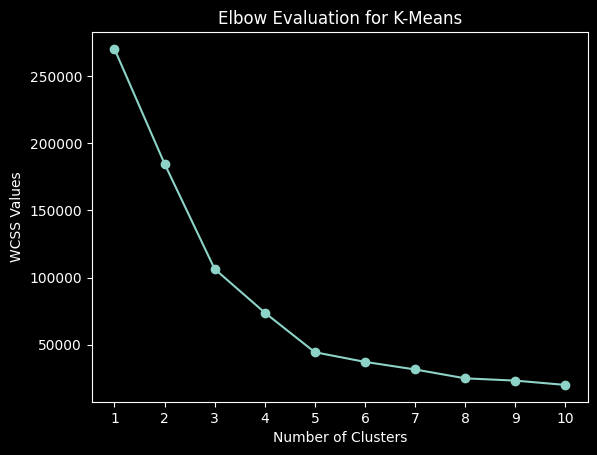

In [66]:
plt.plot(k_value_list, wcss_value_list)
plt.scatter(k_value_list, wcss_value_list)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')
plt.title('Elbow Evaluation for K-Means')
plt.xticks(k_value_list)
;                           #hides all the stuff matplotlib shows before the plot 

Now, the elbow point here is 5 --> point from where curve starts to flatten out 
Therefore, 5 is the optimal number of clusters
- After determining that 5 is the best number, now we can use it to train our model

In [67]:
kmeans_model = KMeans(n_clusters=5, random_state=10)
df['Cluster'] = kmeans_model.fit_predict(X)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


we start from 0 therefore, 4 is actually 5th

In [68]:
df['Cluster'].unique()

array([4, 2, 1, 3, 0], dtype=int32)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

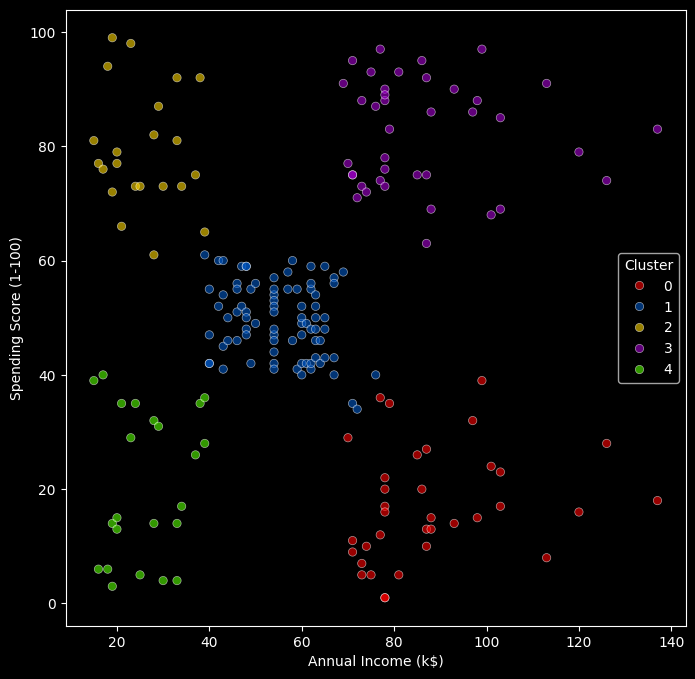

In [69]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue='Cluster', palette='prism', alpha=0.6)


so now we see 5 different clusters marked with different colors 